<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("data.csv")

In [271]:
df.shape

(536, 8)

In [272]:
df.head()

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ISE
0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.038376
1,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,0.031813
2,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.026353
3,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.084716
4,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,0.009658


In [273]:
# df.sample(n = 10)

In [274]:
column_names = df.columns
print(column_names)

Index(['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM', 'ISE'], dtype='object')


In [275]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # create subplots
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# # iterate over column names
# for i, col in enumerate(df.columns):
#     # select column using [] operator
#     col_data = df[col]
    
#     # plot column data on subplot
#     axs[i//4, i%4].plot(col_data)
#     axs[i//4, i%4].set_title(col)
#     axs[i//4, i%4].set_xlabel('Time')
#     axs[i//4, i%4].set_ylabel('Amplitude')
#     axs[i//4, i%4].grid(True)

# # adjust subplot spacing
# plt.tight_layout()

# # display plot
# plt.show()

# # save the input and output data
# plt.savefig('In_Out_Data.png')


**Drawing the heatmap**

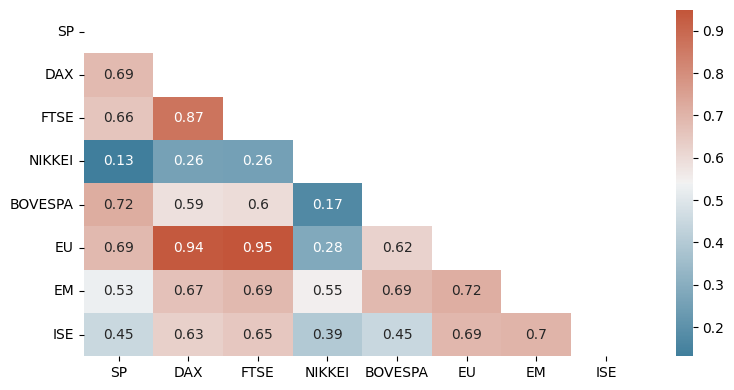

In [276]:
import seaborn as sns

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 4))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.tight_layout()
plt.savefig('Heatmap.png')

**Correlation between different variables**

In [277]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='ISE', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['ISE'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 ISE        1
EM         2
EU         3
FTSE       4
DAX        5
SP         6
BOVESPA    7
NIKKEI     8
Name: ISE, dtype: int64


**Data spliting**

In [278]:
# Split data into training and testing sets
X = df.drop('ISE', axis=1).values
y = df['ISE'].values
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

**Select best features**

In [279]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

#======================================
# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 
selector  = SelectKBest(f_classif, k=3)
#======================================

X_train    = selector.fit_transform(X_Train, y_train)
X_test     = selector.transform(X_Test)

y_train = y_train
y_test  = y_test

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [280]:
import matplotlib.pyplot as plt

def plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, filename):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # subplot 1: actual and estimated responses for training cases
    axs[0].plot(y_train, label='Actual')
    axs[0].plot(y_train_pred, label='Predicted')
    axs[0].set_title('Training Case')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[0].grid()

    # subplot 2: actual and estimated responses for testing cases
    axs[1].plot(y_test, label='Actual y_test')
    axs[1].plot(y_test_pred, label='Estimated y_test_pred')
    axs[1].set_title('Testing Case')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()
    axs[1].grid()

    # adjust subplot spacing
    plt.tight_layout()

    # Save the figure
    fig.savefig(filename)

    # display plot
    plt.show()

In [281]:
import matplotlib.pyplot as plt
import numpy as np

def plot_two_responses(y_train, y_train_pred, filename, label):
    
    # Assuming y_train and y_train_pred are numpy arrays
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Plot actual vs predicted response
    ax1.plot(y_train)
    ax1.plot(y_train_pred)
    # ax1.set_xlabel('Training Examples')
    ax1.set_ylabel('Response')
    ax1.set_title(label)
    ax1.legend()
    ax1.grid()

    # Plot error over time
    errors = y_train - y_train_pred.flatten()
    ax2.plot(errors, label='Error')
    # ax2.set_xlabel('Training Examples')
    ax2.set_ylabel('Error')
    # ax2.set_title('Error vs. Training Examples (Training Set)')
    ax2.legend()
    ax2.grid()

    # adjust subplot spacing
    plt.tight_layout()

    plt.show()
    # Save the figure
    fig.savefig(filename)


In [282]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def plot_actual_vs_predicted(name, y_train, y_train_pred, y_test, y_test_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

    ax1.scatter(y_train, y_train_pred, label='Training')
    ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
    ax1.set_xlabel('Actual')
    ax1.set_ylabel('Predicted')
    ax1.set_title(f'Training Set (R-Square: {round(r2_score(y_train, y_train_pred), 3)})')
    ax1.grid(True)

    ax2.scatter(y_test, y_test_pred, label='Testing')
    ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    ax2.set_xlabel('Actual')
    ax2.set_ylabel('Predicted')
    ax2.set_title(f'Testing Set (R-Square: {round(r2_score(y_test, y_test_pred), 3)})')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Save the figure with the specified filename
    fig.savefig(f'{name}.png')



In [283]:
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, y_train, X_test, y_test):

    # Calculate predictions for both training and testing datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the MSE, R-squared, MAE, VAF, and RMSE for both training and testing datasets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
       
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2  = r2_score(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae  = mean_absolute_error(y_test, y_test_pred)

    train_rmse = sqrt(train_mse)
    test_rmse = sqrt(test_mse)

    # Create a table to display the results
    results = pd.DataFrame({
        'Metric': ['MSE', 'MAE', 'RMSE', 'R-squared'],
        'Training Set': [train_mse, train_mae, train_rmse, train_r2],
        'Testing Set': [test_mse, test_mae, test_rmse, test_r2]
    })
    print(results)
    
    return results

In [284]:
X_train.shape

(214, 3)

**Split data into training and testing sets**

**Linear Regression**

In [285]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
LinearR = LinearRegression()
LinearR.fit(X_train, y_train)

# Evaluate the model on the testing set
score = LinearR.score(X_test, y_test)
print('R-squared score:', score)

# Predict output for training and testing sets
y_train_pred = LinearR.predict(X_train)
y_test_pred = LinearR.predict(X_test)


R-squared score: 0.5788783163358471


In [286]:
evaluate_model(LinearR, X_train, y_train, X_test, y_test)

      Metric  Training Set  Testing Set
0        MSE      0.000163     0.000205
1        MAE      0.010126     0.010635
2       RMSE      0.012749     0.014332
3  R-squared      0.573528     0.578878


,Metric,Training Set,Testing Set
0,MSE,0.000163,0.000205
1,MAE,0.010126,0.010635
2,RMSE,0.012749,0.014332
3,R-squared,0.573528,0.578878


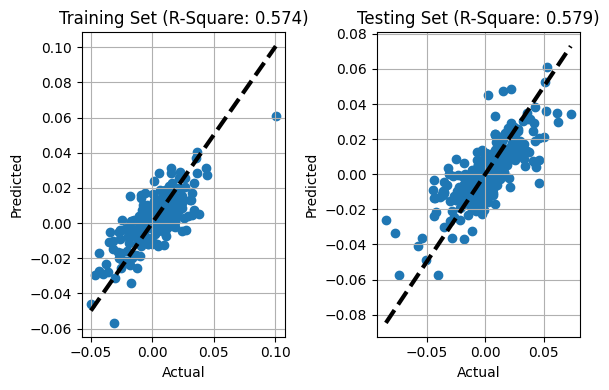

In [287]:
plot_actual_vs_predicted('Correlation_LR', y_train, y_train_pred, y_test, y_test_pred)

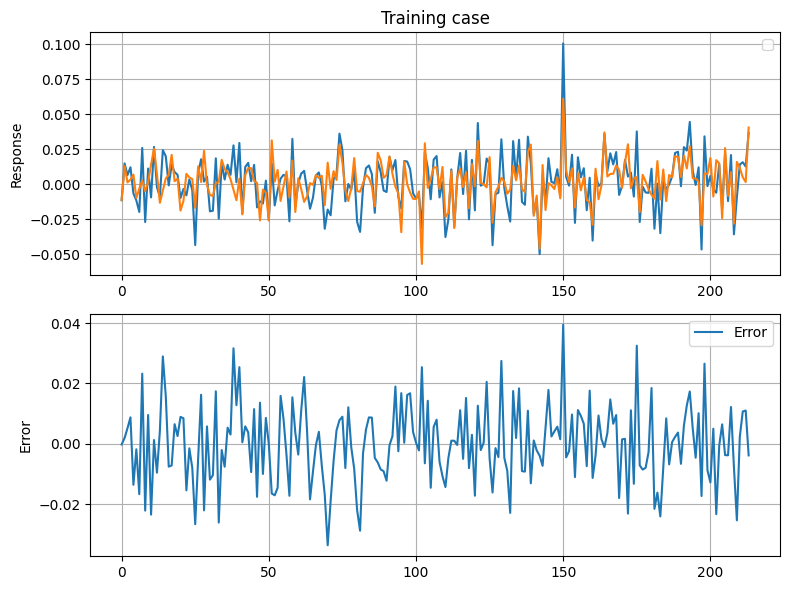

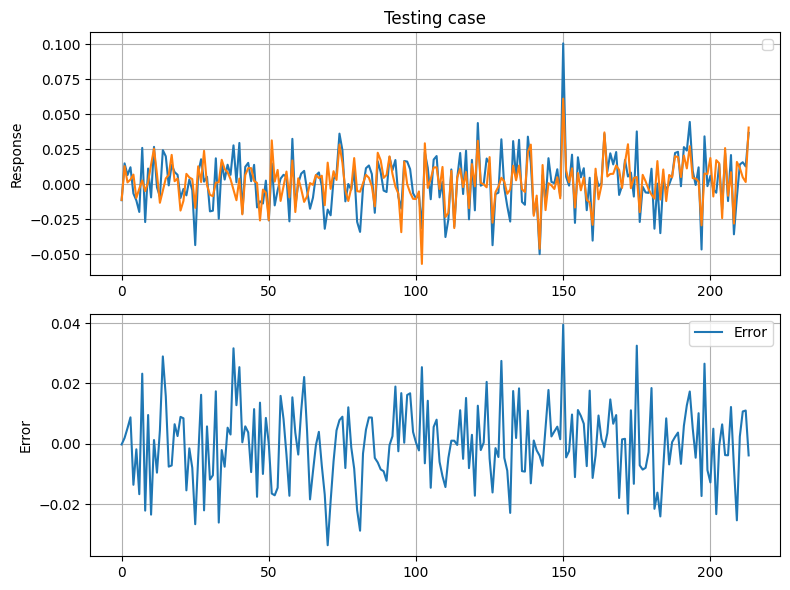

In [288]:
plot_two_responses(y_train, y_train_pred, 'LR_training', 'Training case')
plot_two_responses(y_train, y_train_pred, 'LR_testing', 'Testing case')

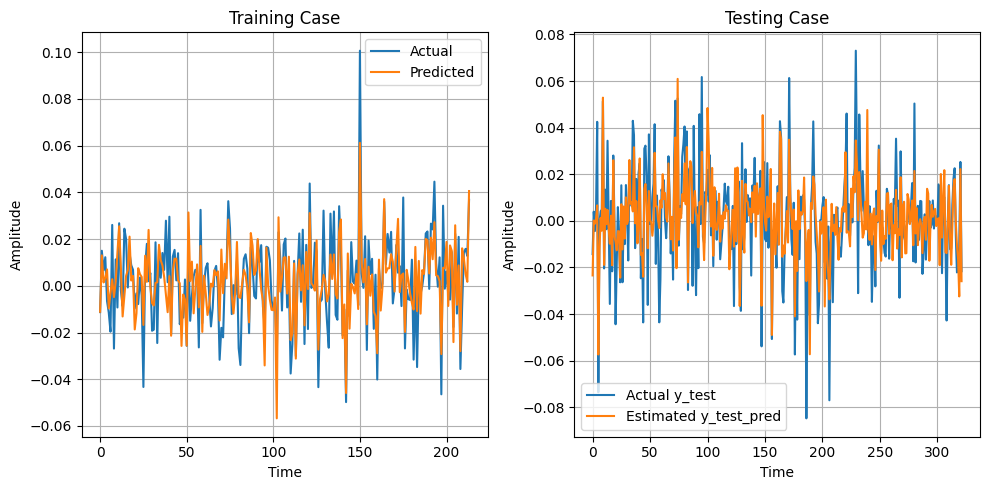

In [289]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, 'Actual_Estimated_SS_LR.png')

**Deep Learning**

In [290]:
HL1 = 15
HL2 = 7

# Define the model architecture
DL_model = Sequential()
DL_model.add(Dense(HL1, input_dim=X_train.shape[1], activation='relu'))
DL_model.add(Dense(HL2, activation='relu'))
DL_model.add(Dense(1, activation='linear'))

# Compile the model
DL_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model with validation data
history = DL_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/1000
7/7 [==============================] - 1s 33ms/step - loss: 3.5680e-04 - accuracy: 0.0000e+00 - val_loss: 3.8661e-04 - val_accuracy: 0.0000e+00
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 2.8739e-04 - accuracy: 0.0000e+00 - val_loss: 3.3420e-04 - val_accuracy: 0.0000e+00
Epoch 3/1000
7/7 [==============================] - 0s 17ms/step - loss: 2.5963e-04 - accuracy: 0.0000e+00 - val_loss: 3.0775e-04 - val_accuracy: 0.0000e+00
Epoch 4/1000
7/7 [==============================] - 0s 10ms/step - loss: 2.4782e-04 - accuracy: 0.0000e+00 - val_loss: 2.8990e-04 - val_accuracy: 0.0000e+00
Epoch 5/1000
7/7 [==============================] - 0s 10ms/step - loss: 2.3178e-04 - accuracy: 0.0000e+00 - val_loss: 2.8159e-04 - val_accuracy: 0.0000e+00
Epoch 6/1000
7/7 [==============================] - 0s 10ms/step - loss: 2.2448e-04 - accuracy: 0.0000e+00 - val_loss: 2.7334e-04 - val_accuracy: 0.0000e+00
Epoch 7/1000
7/7 [==============================] - 0s 10m

In [291]:
# Predict at training and testing cases
y_train_pred2 = DL_model.predict(X_train)
y_test_pred2 = DL_model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


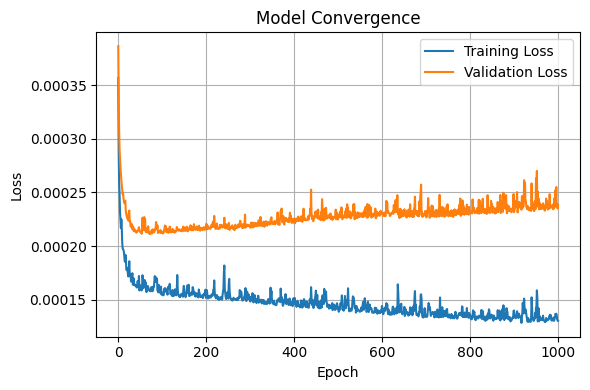

In [292]:
# Plot the convergence curve for training and validation
fig = plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Convergence')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.grid(True) 
plt.legend()
plt.show()
fig.savefig('CNN_convergence.png')

In [293]:
evaluate_model(DL_model, X_train, y_train, X_test, y_test)

11/11 [==============================] - 0s 2ms/step
      Metric  Training Set  Testing Set
0        MSE      0.000129     0.000239
1        MAE      0.009264     0.011258
2       RMSE      0.011372     0.015447
3  R-squared      0.660695     0.510826


,Metric,Training Set,Testing Set
0,MSE,0.000129,0.000239
1,MAE,0.009264,0.011258
2,RMSE,0.011372,0.015447
3,R-squared,0.660695,0.510826


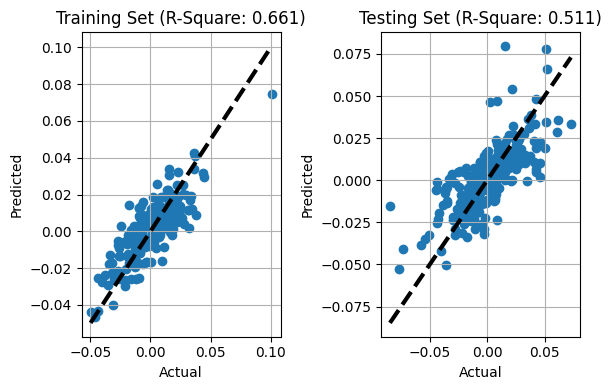

In [294]:
plot_actual_vs_predicted('Correlation_DL', y_train, y_train_pred2, y_test, y_test_pred2)

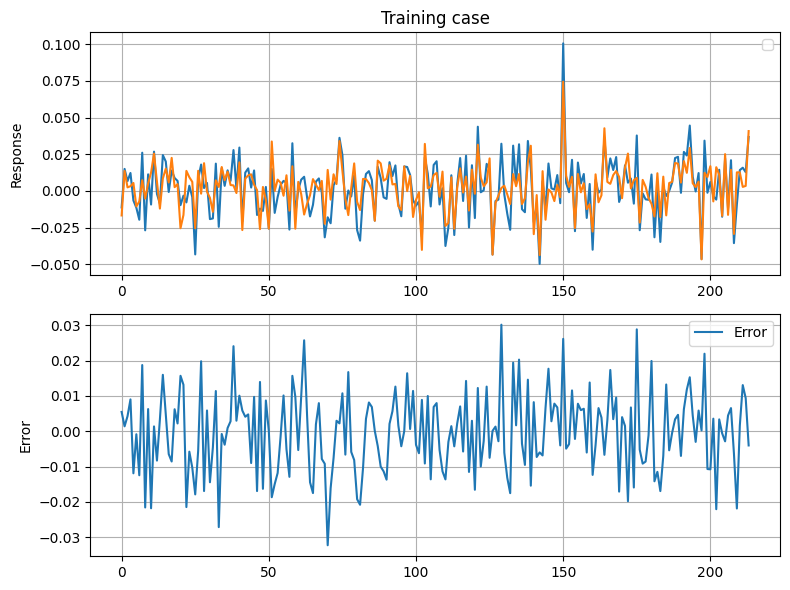

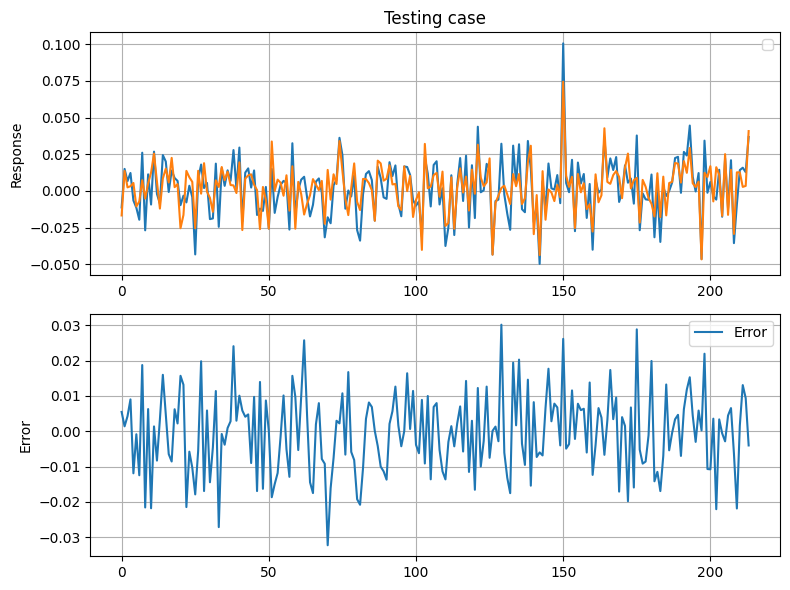

In [295]:
plot_two_responses(y_train, y_train_pred2, 'DL_training.png', 'Training case')
plot_two_responses(y_train, y_train_pred2, 'DL_testing.png', 'Testing case')

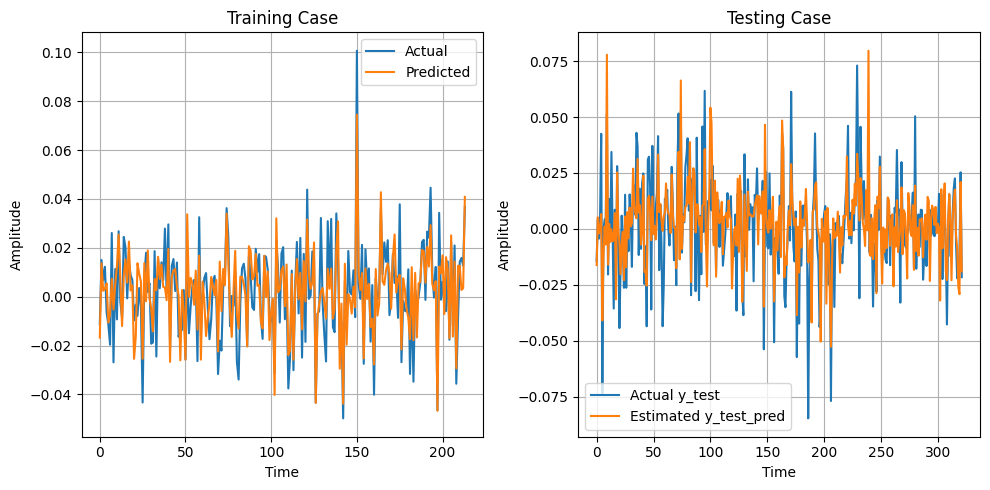

In [296]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred2, y_test, y_test_pred2, 'Actual_Estimated_SS_DL.png')

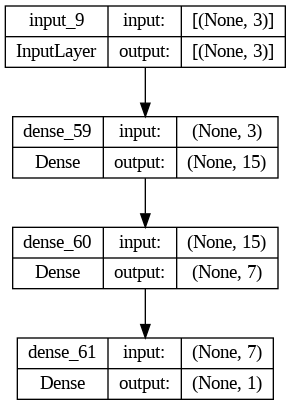

In [297]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_shape = X_train.shape[1]

# Define the model architecture
inputs = Input(shape=(input_shape,))
x = Dense(HL1, activation='relu')(inputs)
x = Dense(HL2, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

In [298]:
# Save the model
model.save('CNN_model_Turkey_2.h5')

In [299]:
# # Load the saved model
# loaded_model = load_model('CNN_model_Turkey.h5')